# Exploratory Data Analysis on Haberman data set 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
hab = pd.read_csv("haberman.csv")
hab.columns=['age','year','ax_nodes','sur_status']
hab1=hab.drop(columns=['sur_status'])
print(hab.shape) 
print(min(hab.age))
print(max(hab.age))

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
hab.dtypes

age           int64
year          int64
ax_nodes      int64
sur_status    int64
dtype: object

In [ ]:
hab.sur_status.describe()

count    305.000000
mean       1.265574
std        0.442364
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: sur_status, dtype: float64

observation:

1)There are 305 patients got affected by cancer

2)Minimum age to get an operation on cancer is 30

3)Maximum age to get an operation on cancer is 83

4)The survival status 1 indicate: patients lived for 5 years after operation

5)The survival status 2 indicate: patients died within 5 years after operation

# Scatter plot

Scatter plot of Axial Nodes and Age

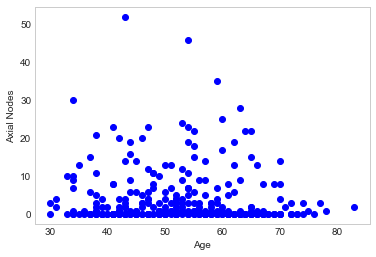

In [ ]:
plt.plot(hab.age,hab.ax_nodes,'bo')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Axial Nodes')
plt.show()


# scatter plot using seaborn

Scatterplot of Axial nodes and Age

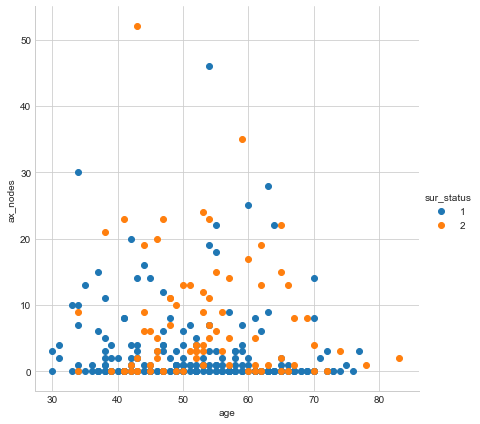

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(hab,hue='sur_status',size=6)\
    .map(plt.scatter,"age","ax_nodes")\
    .add_legend();
plt.show();

# Pair plot

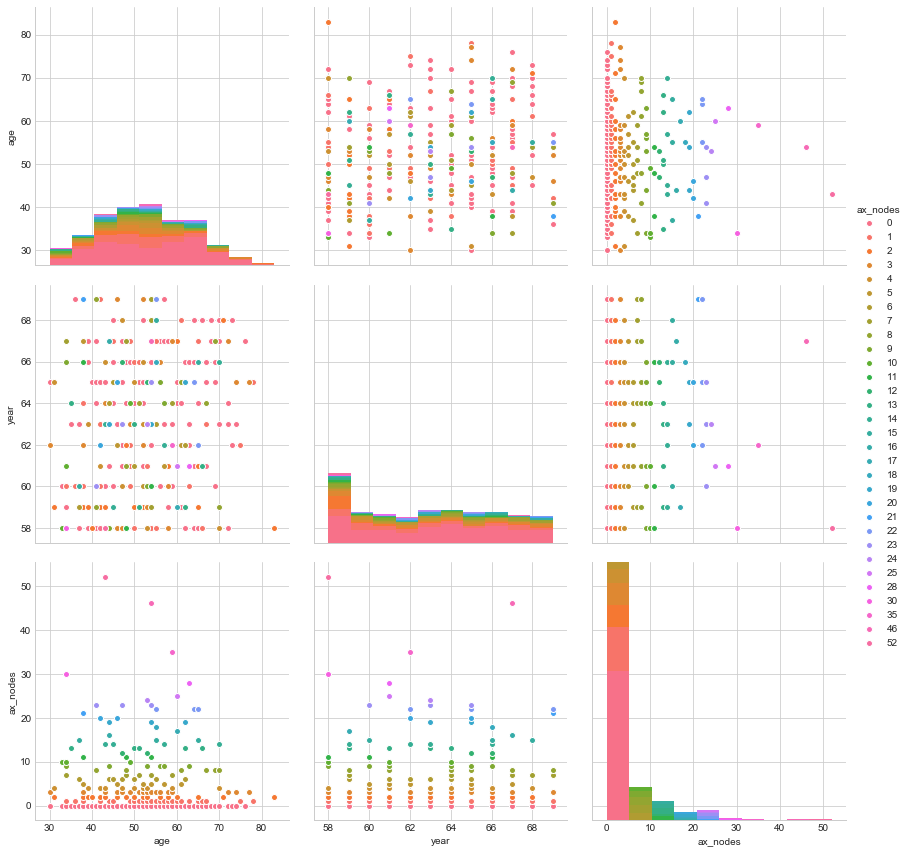

In [ ]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(hab1,hue='ax_nodes',size=4)
plt.show()


Observation:

1)we can not analyze the data clearly using pair plots as majority of points are overlapping  
2)we can not seperate the data linearly 

# Histogram

Histogram of Age

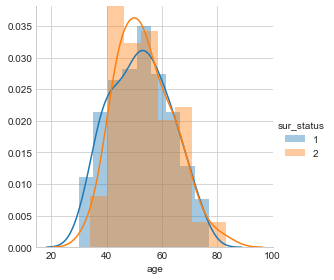

In [ ]:
sns.FacetGrid(hab,hue='sur_status',size=4)\
    .map(sns.distplot,"age")\
    .add_legend()
plt.show()


Histogram of Axial Nodes

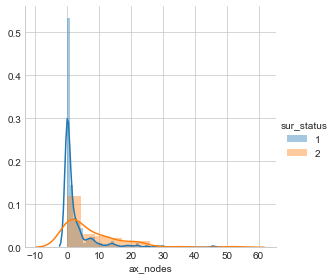

In [ ]:
sns.FacetGrid(hab,hue='sur_status',size=4)\
    .map(sns.distplot,"ax_nodes")\
    .add_legend()
plt.show()


Observation 

Patients affected with 0-3 axial nodes are survived more than 5 years [from the histogram of AxialNodes(ax_nodes)]



# CDF

CDF of Age

Text(0.5,0,'age')

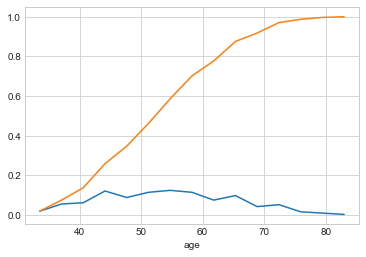

In [ ]:
import numpy as np
counts,bin_edges=np.histogram(hab['age'],bins=15,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("age")


CDF of Axial Nodes

Text(0.5,0,'ax_nodes')

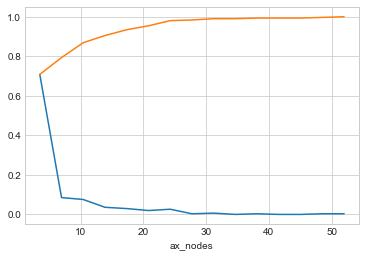

In [ ]:
counts,bin_edges=np.histogram(hab['ax_nodes'],bins=15,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("ax_nodes")


Observation :

1.The attributes Age and year are showing similar results

2.80% patients falls under age group of 30-64

3.83% patients defected with axial nodes less than 10

To make this analysis more clear,look at following cdf

CDF of Age with survival status

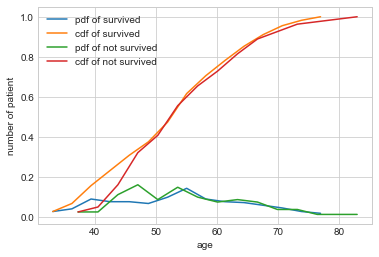

In [ ]:
pt_survived=hab.loc[hab['sur_status']==1]
pt_not_survived=hab.loc[hab['sur_status']==2]
counts,bin_edges = np.histogram(pt_survived['age'],bins=15)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.grid()
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)

label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts,bin_edges = np.histogram(pt_not_survived['age'],bins=15)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)
plt.xlabel('age')
plt.ylabel('number of patient')
plt.legend(label)

CDF of Axila Nodes with Survival Status

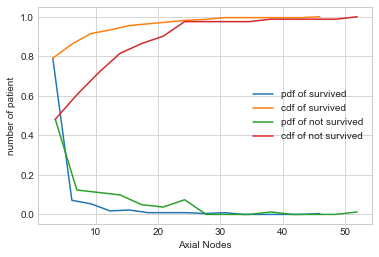

In [ ]:
counts,bin_edges = np.histogram(pt_survived['ax_nodes'],bins=15)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.figure(1)
plt.grid()
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)

label = ["pdf of survived", "cdf of survived", "pdf of not survived", "cdf of not survived"]
counts,bin_edges = np.histogram(pt_not_survived['ax_nodes'],bins=15)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.grid()
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)


plt.xlabel('Axial Nodes')
plt.ylabel('number of patient')
plt.legend(label)

Observation:

1.70% of patients aged less than 58 are survived

2.90% of patients aged 70 are dead 

3.78% of survived patients are defected with 4 axial nodes 

4.patients with more than 45 axial nodes are dead 

# Box plot

Boxplot of Survival status and Axial Nodes

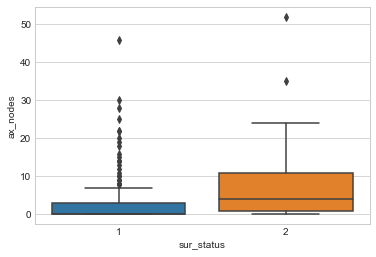

In [ ]:
sns.boxplot(x='sur_status',y='ax_nodes',data=hab)
plt.show()

Boxplot of Survial Status and Age

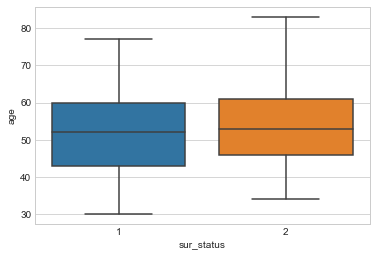

In [ ]:
sns.boxplot(x='sur_status',y='age',data=hab)
plt.show()

# violin plot

Violinplot of Axial Nodes and Survival Status

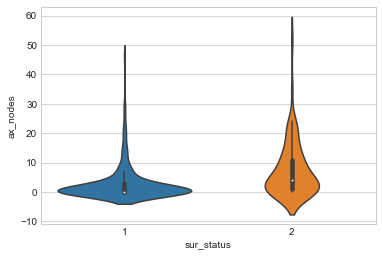

In [ ]:
sns.violinplot(x='sur_status',y='ax_nodes',data=hab)
plt.show()

Violinplot of Age and SurvialStatus

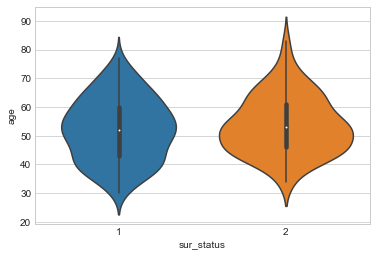

In [ ]:
sns.violinplot(x='sur_status',y='age',data=hab)
plt.show()

Observation:

1.75% patients who's age less than or equal to 60 are survived

2.25% patients have zero axial nodes

# Conclusion

1.Among all the plots,Box plots gives us excellent outcome.

2.The attritube Axillary_lymph_nodes gave us better seperation in the points when compared to other attributes.

3.We can't analyse the data clearly since most of the points are overlapping.

4.25% of patients have zero axial nodes.

5.78% of survived patients has 4 axial nodes.

6.Patients having more than 45 axial nodes are not survive.

7.75% of patients who's age is less than or equal to 60 are survived.
8.90% of patients aged 70 are dead.
